In [1]:
#Jai Ganesh Deva

In [125]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Natural Language Processing Toolkit
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

import os

In [126]:
#Loading the dataset into dataframe 

os.chdir("E:\DAEN - 690")
bijli = pd.read_csv("Electronics_anatomical_features.csv")

In [127]:
bijli.index = np.arange(1,len(bijli) + 1)

In [128]:
bijli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26365 entries, 1 to 26365
Data columns (total 21 columns):
reviewerID                 26365 non-null object
asin                       26365 non-null object
reviewerName               26365 non-null object
helpful                    26365 non-null object
unixReviewTime             26365 non-null int64
reviewText                 26365 non-null object
overall                    26365 non-null int64
reviewTime                 26365 non-null object
summary                    26365 non-null object
upvote                     26365 non-null int64
total_votes                26365 non-null int64
No.of Characters           26365 non-null int64
Number of Sentences        26365 non-null int64
No.of Question Marks       26365 non-null int64
No.of Exclamation Marks    26365 non-null int64
no.of Capital              26365 non-null int64
FRE                        26365 non-null float64
ARI                        26365 non-null float64
helpful_rating  

In [129]:
bijli.describe()

,unixReviewTime,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating
count,2.636500e+04,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000,26365.000000
mean,1.268155e+09,3.643543,58.599734,68.412630,1635.281927,18.050332,0.550465,1.359075,10.523876,74.237199,7.969611,0.747340
std,9.463474e+07,1.533671,276.069625,285.955755,1814.491723,18.605920,1.444861,3.106903,17.763067,11.205630,3.514912,0.267691
min,9.395136e+08,1.000000,0.000000,10.000000,19.000000,1.000000,0.000000,0.000000,0.000000,-197.330000,-2.100000,0.000000
25%,1.195258e+09,2.000000,9.000000,13.000000,545.000000,7.000000,0.000000,0.000000,2.000000,68.200000,6.100000,0.636364
50%,1.290816e+09,4.000000,15.000000,21.000000,1068.000000,12.000000,0.000000,0.000000,5.000000,74.290000,7.700000,0.852941
75%,1.347581e+09,5.000000,32.000000,43.000000,2058.000000,22.000000,1.000000,2.000000,12.000000,81.160000,9.400000,0.939394
max,1.405901e+09,5.000000,30735.000000,31453.000000,25560.000000,382.000000,35.000000,74.000000,513.000000,133.780000,139.800000,1.000000


In [130]:
len(bijli.reviewText[2])

3004

In [131]:
len(bijli.review[2])

3048

In [132]:
len(bijli.summary[2])

43

In [133]:
#Data Cleaning

In [134]:
#Dropping Rendundant features
bijli = bijli.drop(["reviewerName","reviewTime","reviewText","summary","unixReviewTime","helpful"], axis = 1)

In [135]:
bijli.head(1)

,reviewerID,asin,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,review
1,A23C0R77ZP9Z84,1400532655,3,1,22,396,3,4,0,1,73.88,8.8,0.045455,False,An eReader without e-ink? Really?eReaders are ...


In [136]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

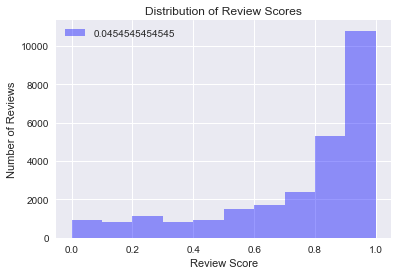

In [137]:
#Distribution of Review score
plt.figure()
plt.hist(bijli["helpful_rating"],facecolor = "blue",alpha = 0.4)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.legend(bijli["helpful_rating"])
plt.show()


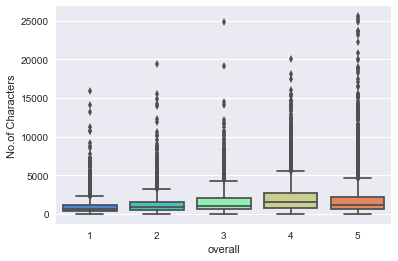

In [138]:
#Ratings vs No of characters
sns.boxplot(x='overall',y='No.of Characters',data=bijli,palette="rainbow",saturation= 0.7)


In [139]:
#PREPROCESSING NLP

In [58]:
#Tokenization

In [140]:
bijli.head(1)

,reviewerID,asin,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,review
1,A23C0R77ZP9Z84,1400532655,3,1,22,396,3,4,0,1,73.88,8.8,0.045455,False,An eReader without e-ink? Really?eReaders are ...


In [141]:
from nltk import sent_tokenize,word_tokenize

In [142]:
bijli["review"] = bijli["review"].fillna("").map(sent_tokenize)

In [143]:
bijli.head(1)

,reviewerID,asin,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,review
1,A23C0R77ZP9Z84,1400532655,3,1,22,396,3,4,0,1,73.88,8.8,0.045455,False,"[An eReader without e-ink?, Really?eReaders ar..."


In [144]:
#Word-Tokenization

In [145]:
bijli["review"] = bijli["review"].apply(lambda x : [word_tokenize(sen) for sen in x])

In [146]:
bijli.head(1)

,reviewerID,asin,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,review
1,A23C0R77ZP9Z84,1400532655,3,1,22,396,3,4,0,1,73.88,8.8,0.045455,False,"[[An, eReader, without, e-ink, ?], [Really, ?,..."


In [147]:
#Stopwords Removal
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [148]:
bijli["review"] = bijli["review"].apply(lambda x: [word for word in x if word not in stop_words])

In [149]:
#POS Tagging
from nltk import pos_tag, pos_tag_sents


bijli["review"] = bijli["review"].apply(lambda x: [nltk.pos_tag(y) for y in x])

In [151]:
bijli.head(1)

,reviewerID,asin,overall,upvote,total_votes,No.of Characters,Number of Sentences,No.of Question Marks,No.of Exclamation Marks,no.of Capital,FRE,ARI,helpful_rating,Label_helpful,review
1,A23C0R77ZP9Z84,1400532655,3,1,22,396,3,4,0,1,73.88,8.8,0.045455,False,"[[(An, DT), (eReader, NN), (without, IN), (e-i..."


In [157]:
arr = bijli.review

In [162]:
arr = str(arr)

In [165]:
arr[58]

'-'

In [166]:
#TF-IDF Vectorizer BOW Phase 2
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer(lowercase=True, stop_words='english')
tfidfbag = TFIDF.fit_transform(arr)

ValueError: Iterable over raw text documents expected, string object received.

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(bijli["review"])

AttributeError: 'list' object has no attribute 'lower'

In [169]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [173]:
# Calculate all the n-grams found in all documents
from itertools import islice
cvec.fit(bijli.review)
list(islice(cvec.vocabulary_.items(), 20))


AttributeError: 'list' object has no attribute 'lower'